In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('data.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [3]:
data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [4]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## We drop all the values where work experience is greater than 70 and also the values where age is greater than 100

In [5]:
data = data[~(data['person_emp_length'] > 70) & ~(data['person_age']>100)]

In [6]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32574.000000,3.257400e+04,31679.000000,32574.000000,29459.000000,32574.000000,32574.000000,32574.000000
mean,27.718426,6.587848e+04,4.782064,9588.018051,11.011529,0.218180,0.170202,5.804108
std,6.204987,5.253194e+04,4.034948,6320.249598,3.240497,0.413017,0.106755,4.053873
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
data.reset_index(drop = True, inplace = True)

Text(0.5, 0, 'Interest Rate')

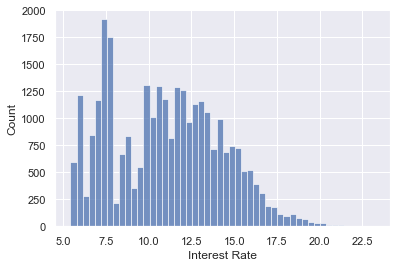

In [8]:
import seaborn as sns
sns.set_theme(style='darkgrid')
p1 = sns.histplot(data = data,x = 'loan_int_rate')
p1.set_xlabel('Interest Rate')

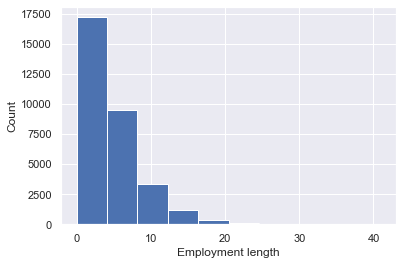

In [9]:
plt.hist(x = 'person_emp_length', data = data)
plt.xlabel('Employment length')
plt.ylabel('Count')
plt.show()

### Most of the people have work experience between  0- 10 years

In [10]:
data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32569,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32570,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32571,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32572,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32573,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [11]:
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### As both, employee length and interest rate follows normal distribution we use median to impute null values

In [12]:
data['loan_int_rate'] = data['loan_int_rate'].replace(np.NaN, data['loan_int_rate'].median())

In [13]:
data['person_emp_length'] = data['person_emp_length'].fillna(data['person_emp_length'].median())

In [14]:
data.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [15]:
data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32569,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32570,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32571,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32572,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32573,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


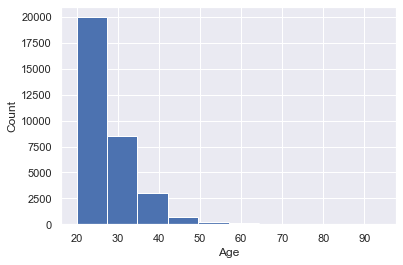

In [16]:
plt.hist(x = 'person_age', data = data, bins = 10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [17]:
cat = []
for i in data.columns:
    if data[i].dtypes == 'object':
        cat.append(i)
cat    

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [18]:
data[cat].nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32574 entries, 0 to 32573
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  object 
 3   person_emp_length           32574 non-null  float64
 4   loan_intent                 32574 non-null  object 
 5   loan_grade                  32574 non-null  object 
 6   loan_amnt                   32574 non-null  int64  
 7   loan_int_rate               32574 non-null  float64
 8   loan_status                 32574 non-null  int64  
 9   loan_percent_income         32574 non-null  float64
 10  cb_person_default_on_file   32574 non-null  object 
 11  cb_person_cred_hist_length  32574 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [20]:
data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32569,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32570,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32571,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32572,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32573,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [21]:
data1 = data.copy() # copying the data just to make the heatmap and to use all the dummy variables.

In [22]:
dummies1 = pd.get_dummies(data1[cat],drop_first = False)

In [23]:
data1 = pd.concat([data1,dummies1], axis = 1)

In [24]:
num_cols = pd.DataFrame(data1[data1.select_dtypes(include=['float', 'int','uint8']).columns])

In [25]:
corr = num_cols.corr().sort_values('loan_status', axis=1, ascending=False)
corr = corr.sort_values('loan_status', axis=0, ascending=True)

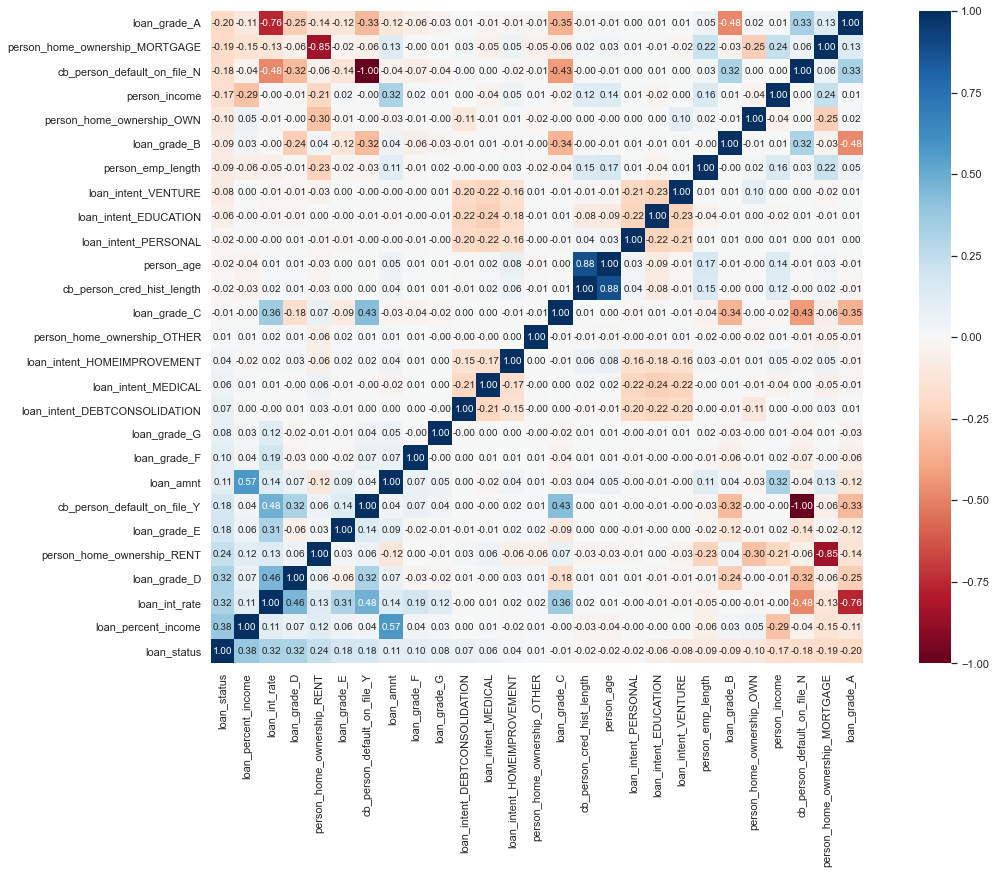

In [26]:
f, ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(corr, square=True, annot=True, fmt='.2f',
                      center=0,cmap='RdBu',annot_kws={"size": 10})

### Income, employment length, and age all have a negative impact on loan status default, implying that the higher these factors are, the less risky the individual is.

### Loan percent income, loan int rate, and loan amount all have a positive impact on loan status being defaulted, hence the higher these variables are, the more riskier the individual is.

### Loan category D and E are riskier as they tend more to get default

In [27]:
dummies = pd.get_dummies(data[cat],drop_first = True) #Using drop_first = True in data to remove redundancy in data
data = pd.concat([data,dummies], axis = 1)
data = data.drop(cat,axis =1)

In [28]:
cat

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [29]:
data.tail()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
32569,57,53000,1.0,5800,13.16,0,0.11,30,0,0,...,0,1,0,0,1,0,0,0,0,0
32570,54,120000,4.0,17625,7.49,0,0.15,19,0,0,...,0,1,0,0,0,0,0,0,0,0
32571,65,76000,3.0,35000,10.99,1,0.46,28,0,0,...,0,0,0,1,0,0,0,0,0,0
32572,56,150000,5.0,15000,11.48,0,0.10,26,0,0,...,0,1,0,1,0,0,0,0,0,0
32573,66,42000,2.0,6475,9.99,0,0.15,30,0,0,...,1,0,0,1,0,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split
y = data.loan_status
X = data.drop('loan_status',axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.25)
print('The train dataset has {} data\nThe test dataset has {} data'.format(X_train.shape[0], X_test.shape[0]))

The train dataset has 24430 data
The test dataset has 8144 data


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## For hyperparameter tuning, we'll utilize the Exhaustive Grid Search method. It will take all the combination of parameters and provides us with the best possible combination.

### 1. k nearest neighbor

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors' : [5,6,9], 
          'weights' : ['uniform','distance'],
          'metric' : ['minkowski','euclidean','chebyshev']}

gs = GridSearchCV(KNeighborsClassifier(), params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
g_res.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}

In [33]:
classifier = KNeighborsClassifier(n_neighbors = 9, weights = 'distance',metric = 'minkowski')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6295  140]
 [ 649 1060]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6435
           1       0.88      0.62      0.73      1709

    accuracy                           0.90      8144
   macro avg       0.89      0.80      0.83      8144
weighted avg       0.90      0.90      0.90      8144



In [35]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(classifier, X, y, cv = 4)
print('kNN Model accuracy: ',np.mean(result))

kNN Model accuracy:  0.8308169092887041


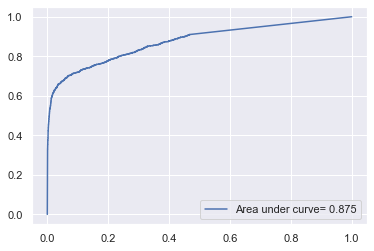

In [36]:
from sklearn import metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba),3)
plt.plot(fpr,tpr,label="Area under curve= "+str(auc))
plt.legend(loc=4)
plt.show()

### 2. Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
n_estimators = [int(x) for x in range(50,100,2)]
bootstrap = [True, False]
max_depth = [int(x) for x in np.linspace(20,60, num = 3)]


params = {'n_estimators': n_estimators,
               'bootstrap': bootstrap,
               'max_depth': max_depth}

gs = GridSearchCV(RandomForestClassifier(), params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
g_res.best_params_

Fitting 3 folds for each of 150 candidates, totalling 450 fits


{'bootstrap': False, 'max_depth': 60, 'n_estimators': 78}

In [39]:
classifier = RandomForestClassifier(bootstrap= True, max_depth= 40, n_estimators= 90)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6372   63]
 [ 478 1231]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6435
           1       0.95      0.72      0.82      1709

    accuracy                           0.93      8144
   macro avg       0.94      0.86      0.89      8144
weighted avg       0.93      0.93      0.93      8144



In [40]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(classifier, X, y, cv = 4)
print('Random forest Model accuracy: ',np.mean(result))

Random forest Model accuracy:  0.9251245563101311


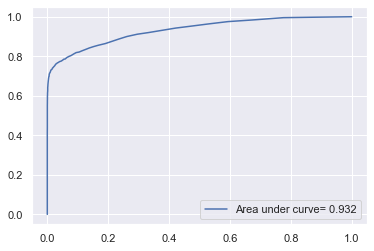

In [42]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = round(metrics.roc_auc_score(y_test, y_pred_proba),3)
plt.plot(fpr,tpr,label="Area under curve= "+str(auc))
plt.legend(loc=4)
plt.show()